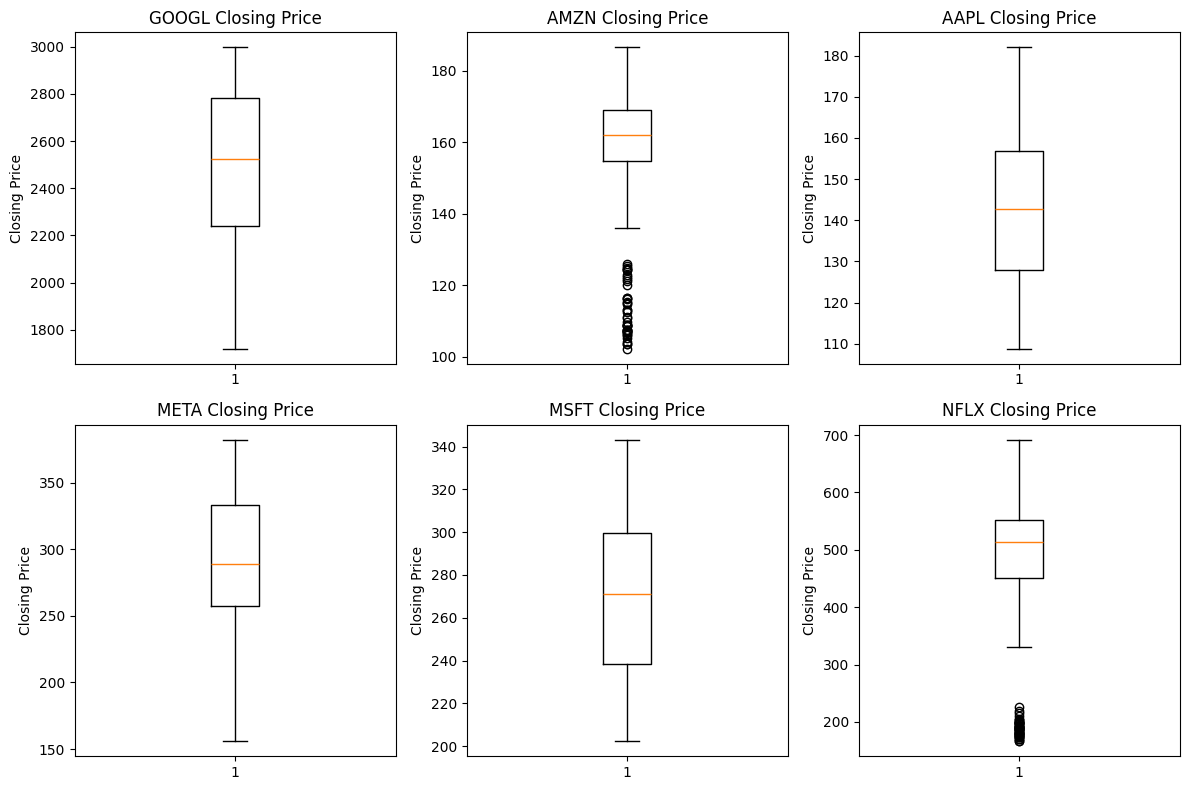

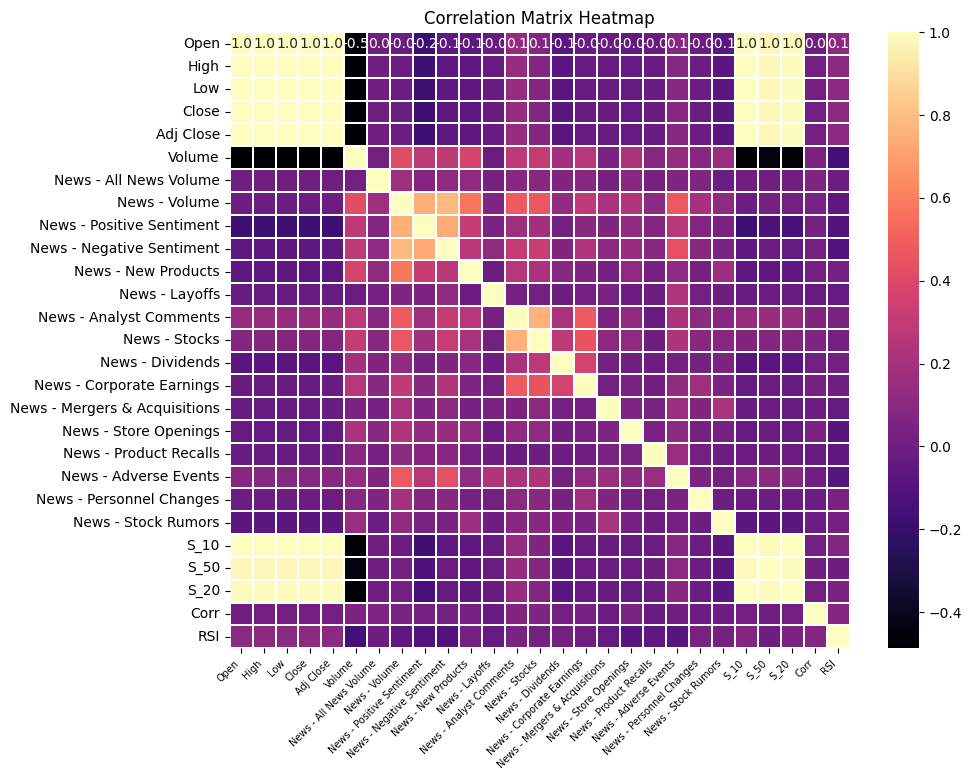

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


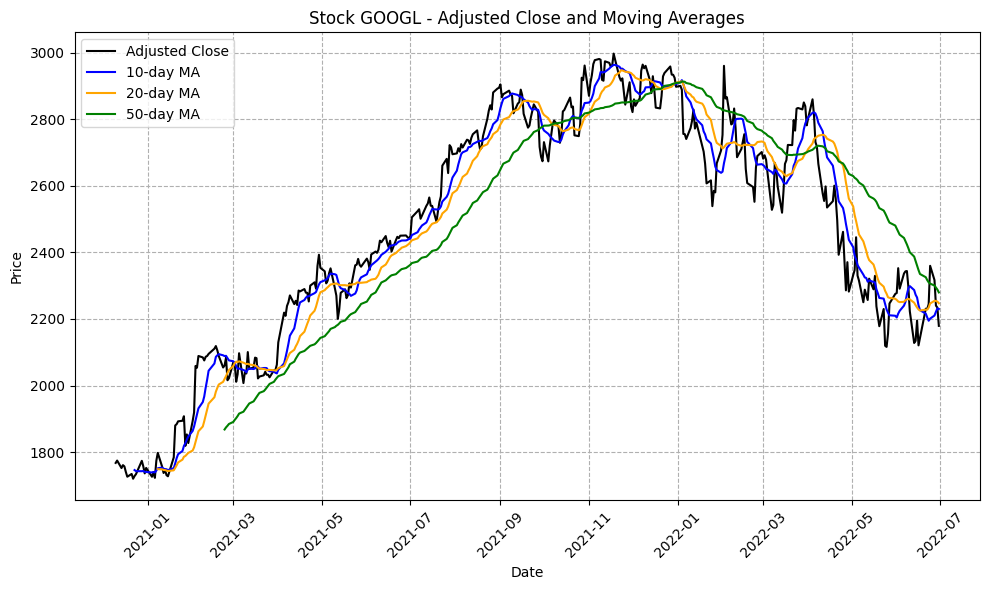

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


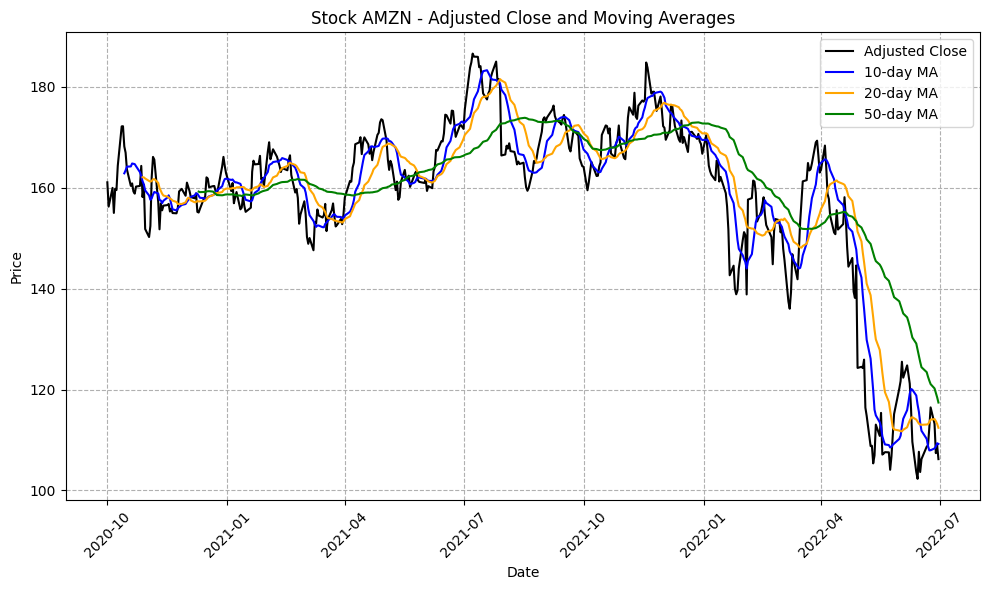

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


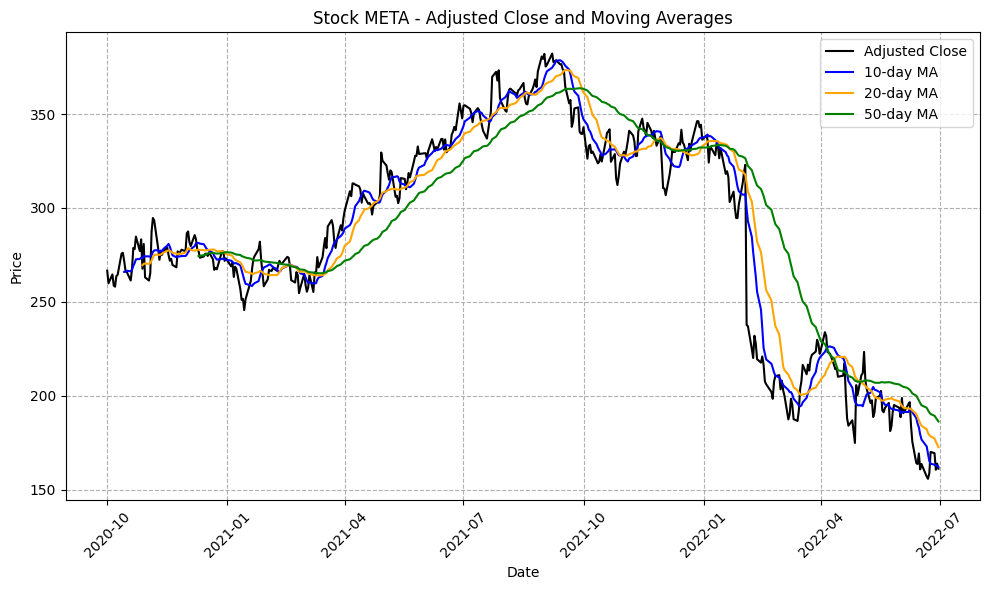

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


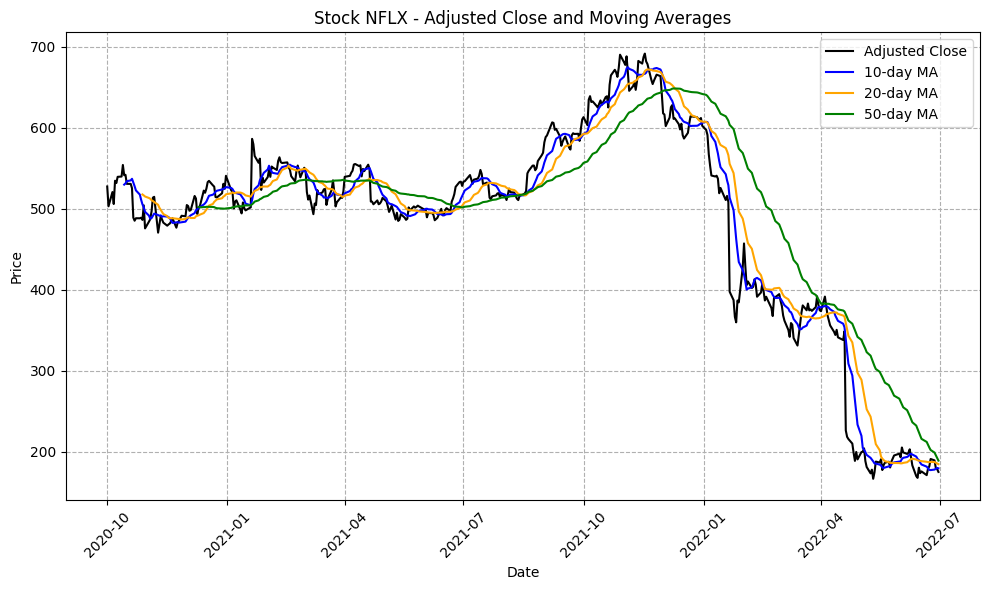

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


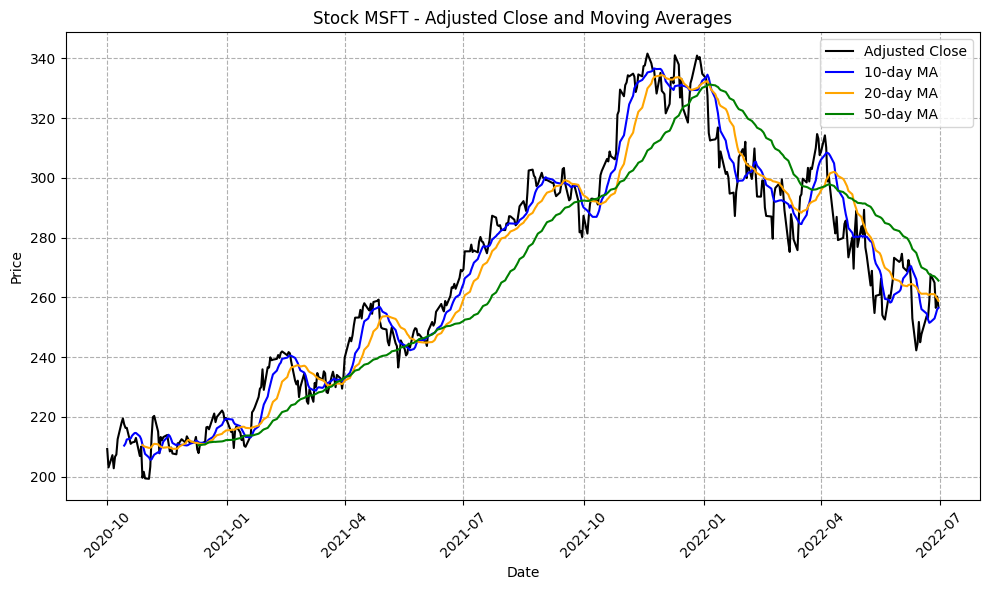

/var/folders/dq/2m2lnnc96gdg8vhnqldpvtww0000gn/T/ipykernel_37701/3615325848.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


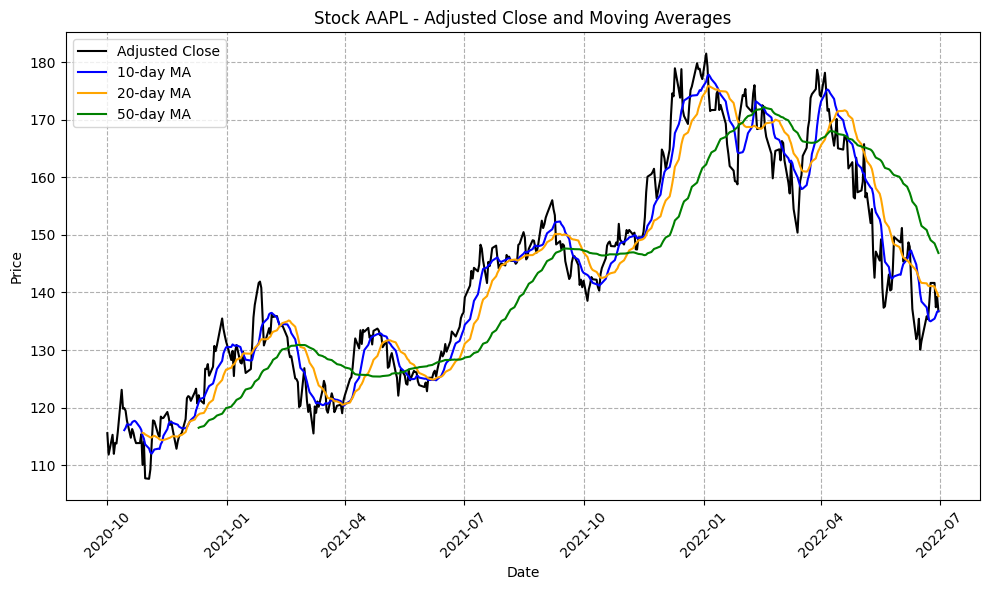

Total Positive Sentiments:
GOOGL: 3.18%
AMZN: 17.76%
META: 0.01%
NFLX: 13.34%
MSFT: 3.73%
AAPL: 10.32%
Total Negative Sentiments:
GOOGL: 3.23%
AMZN: 7.15%
META: 0.06%
NFLX: 5.28%
MSFT: 2.67%
AAPL: 5.05%
The stock with the most positive news sentiment is AMZN with a total positive sentiment of 139298.0.
The stock with the most negative news sentiment is AMZN with a total negative sentiment of 56120.0.


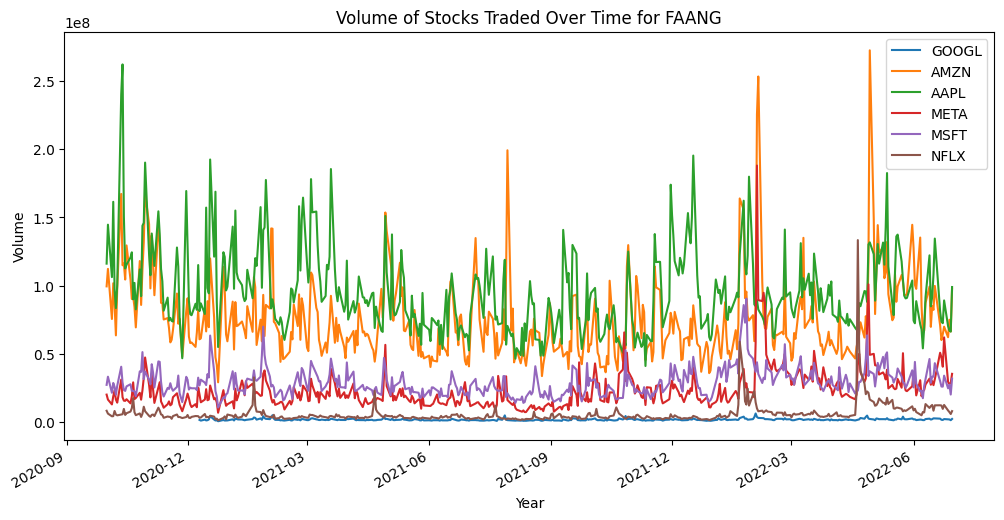

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import talib as ta
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV as RSCV
from sklearn.tree import plot_tree
import matplotlib.dates as mdates


# Select only the specified columns for the news data
news_columns = [
    'News - All News Volume', 'News - Volume',
    'News - Positive Sentiment', 'News - Negative Sentiment', 'News - New Products',
    'News - Layoffs', 'News - Analyst Comments', 'News - Stocks', 'News - Dividends',
    'News - Corporate Earnings', 'News - Mergers & Acquisitions', 'News - Store Openings',
    'News - Product Recalls', 'News - Adverse Events', 'News - Personnel Changes',
    'News - Stock Rumors'
]

stock_columns = [
     'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'
]
selected_columns = ['Open', 'High', 'Low', 'S_10', 'News - Positive Sentiment', 'News - New Products',
                        'News - Layoffs', 'News - Analyst Comments', 'News - Negative Sentiment', 'RSI', 'Corr']

# Define a list of FAANG stock symbols
faang_stocks = ['GOOGL', 'AMZN', 'META', 'NFLX', 'MSFT', 'AAPL']

def parse_data():
    # Load the data from the CSV file
    data = pd.read_csv('/Users/olivialeighton/Downloads/archive/data.csv')
    faang_stock_data = data[data['Symbol'].isin(faang_stocks)]
    faang_stock_data = faang_stock_data.dropna()
    return faang_stock_data
faang_stock_data = parse_data()

# calculate moving averages, corr and RSI variables for faang stocks
def feature_engineering(faang_stock_data):
    faang_stock_data_copy = faang_stock_data.copy()
    faang_stock_data_copy.loc[:, 'S_10'] = faang_stock_data_copy['Close'].rolling(window=10).mean()
    faang_stock_data_copy.loc[:, 'S_50'] = faang_stock_data_copy['Close'].rolling(window=50).mean()
    faang_stock_data_copy.loc[:, 'S_20'] = faang_stock_data_copy['Close'].rolling(window=20).mean()
    faang_stock_data_copy.loc[:, 'Corr'] = faang_stock_data_copy['Close'].rolling(window=10).corr(faang_stock_data_copy['S_10'])
    faang_stock_data_copy.loc[:, 'RSI'] = ta.RSI(np.array(faang_stock_data_copy['Close']), timeperiod=10)
    # Drop rows with missing values
    faang_stock_data_copy = faang_stock_data_copy.dropna()
    
   
    return faang_stock_data_copy
faang_stock_data = feature_engineering(faang_stock_data)


# The remainder of this code is Exploratory Data Analysis
def box_plots(faang_stock_data):
    faang_stocks = faang_stock_data['Symbol'].unique()
    plt.figure(figsize=(12, 8))
    for i, stock_symbol in enumerate(faang_stocks, start=1):
        plt.subplot(2, 3, i)
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        plt.boxplot(stock_data['Close'])
        plt.title(f'{stock_symbol} Closing Price')
        plt.ylabel('Closing Price')

    plt.tight_layout()
    plt.show()

box_plots(faang_stock_data)

def save_heatmap():
    # Create a DataFrame with the selected columns
    correlation_data = faang_stock_data.select_dtypes(include=['number'])
    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()
    # Create a heatmap
    plt.figure(figsize=(10, 8)) 
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".1f", linewidths=0.3)
    plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right
    plt.title("Correlation Matrix Heatmap")
    
    # Adjust font size for x-axis labels at the top
    heatmap.tick_params(axis='x', which='both', labelsize=7)  # Adjust label size as needed
    plt.show()
save_heatmap()

def plot_stock_data(faang_stock_data):
    for symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        # Convert 'Date' column to datetime
        stock_data['Date'] = pd.to_datetime(stock_data['Date'])

        # Calculate moving averages
        stock_data.loc[:, 'S_10'] = stock_data['Adj Close'].rolling(window=10).mean()
        stock_data.loc[:, 'S_20'] = stock_data['Adj Close'].rolling(window=20).mean()
        stock_data.loc[:, 'S_50'] = stock_data['Adj Close'].rolling(window=50).mean()

        # Plotting adjusted closing price and moving averages
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adjusted Close', color='black')
        plt.plot(stock_data['Date'], stock_data['S_10'], label='10-day MA', color='blue')
        plt.plot(stock_data['Date'], stock_data['S_20'], label='20-day MA', color='orange')
        plt.plot(stock_data['Date'], stock_data['S_50'], label='50-day MA', color='green')
        plt.title(f"Stock {symbol} - Adjusted Close and Moving Averages")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(which='both', linestyle='--')
        plt.tight_layout()
        plt.show()
plot_stock_data(faang_stock_data)


positive_sentiments = {}
negative_sentiments = {}

def positive_vs_negative_sentiment_totals():
    for stock_symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        total_positive_sentiment = stock_data['News - Positive Sentiment'].sum()
        total_negative_sentiment = stock_data['News - Negative Sentiment'].sum()
        news_volume = stock_data['News - Volume'].sum()
        positive_sentiments[stock_symbol] = total_positive_sentiment
        negative_sentiments[stock_symbol] = total_negative_sentiment
    print("Total Positive Sentiments:")
    for stock_symbol, total_positive in positive_sentiments.items():
        percent_positive = (total_positive / news_volume) * 100.0
        print(f"{stock_symbol}: {percent_positive:.2f}%")

    print("Total Negative Sentiments:")
    for stock_symbol, total_negative in negative_sentiments.items():
        total_news = positive_sentiments[stock_symbol] + total_negative
        percent_negative = (total_negative / news_volume) * 100.0
        print(f"{stock_symbol}: {percent_negative:.2f}%")

    most_positive_stock = max(positive_sentiments, key=positive_sentiments.get)
    most_negative_stock = max(negative_sentiments, key=negative_sentiments.get)

    print(f"The stock with the most positive news sentiment is {most_positive_stock} with a total positive sentiment of {positive_sentiments[most_positive_stock]}.")
    print(f"The stock with the most negative news sentiment is {most_negative_stock} with a total negative sentiment of {negative_sentiments[most_negative_stock]}.")
positive_vs_negative_sentiment_totals()

def plot_volume(faang_stock_data):
    fig, ax = plt.subplots(figsize=(12, 6))
    faang_stocks = faang_stock_data['Symbol'].unique()

    for stock_symbol in faang_stocks:
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        dates = pd.to_datetime(stock_data['Date'])
        volume = stock_data['Volume']
        ax.plot(dates, volume, label=stock_symbol)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume')
    ax.set_title('Volume of Stocks Traded Over Time for FAANG')
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

# Assuming faang_stock_data is your dataset containing FAANG stock information
plot_volume(faang_stock_data)




/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.494e+04, tolerance: 3.920e+03
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.724e+02, tolerance: 1.184e+02
  model = cd_fast.enet_coordinate_descent(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+02, toleranc

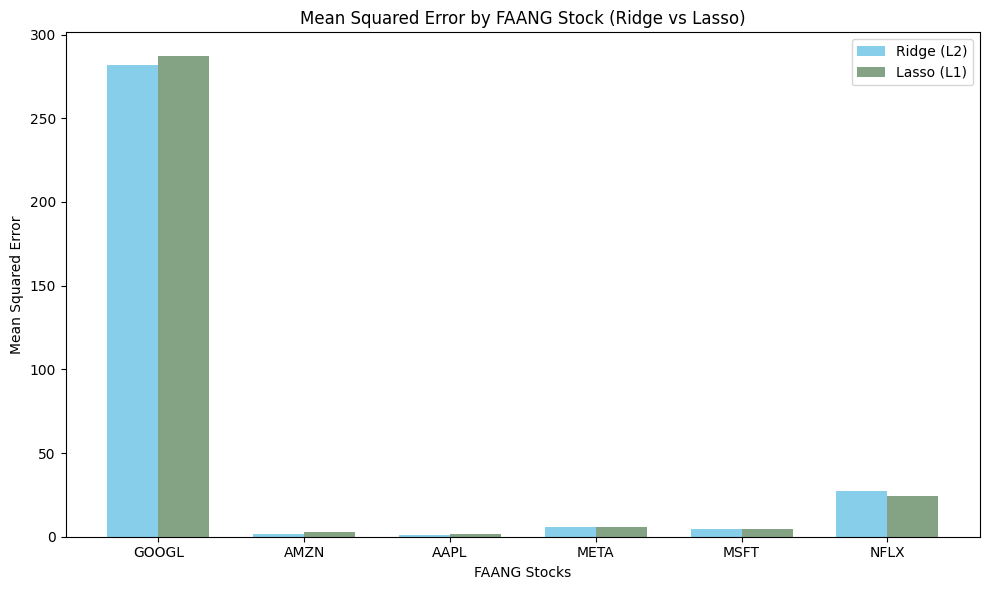

[281.735315312785, 1.395339850946182, 1.2170369225706517, 5.625713839595346, 4.563658045484862, 27.554540899022076]
[286.95772215441553, 2.5853368859521826, 1.9084454473989476, 5.711267525532225, 4.393261015651723, 24.101815443524007]


In [150]:
# Linear Regression model

def linear_regression_model_per_stock(faang_stock_data):
    faang_stocks = faang_stock_data['Symbol'].unique()
    metrics = [ 'Mean Squared Error']
    color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 

    ridge_metrics = {metric: [] for metric in metrics}
    lasso_metrics = {metric: [] for metric in metrics}

    for stock_symbol in faang_stocks:
        # Filter the data for the specified stock
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == stock_symbol]
        # Select features (X) and target variable (y) for the stock
        X = stock_data[selected_columns]
        y = stock_data['Close']

        # Split the data into training and testing sets
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

        model = LinearRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        ridge_model = Ridge(alpha=0.5)
        ridge_model.fit(x_train, y_train)
        y_pred_ridge = ridge_model.predict(x_test)
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        ridge_metrics['Mean Squared Error'].append(mse_ridge)
        
        lasso_model = Lasso(alpha=0.5)
        lasso_model.fit(x_train, y_train)
        y_pred_lasso = lasso_model.predict(x_test)
        mse_lasso = mean_squared_error(y_test, y_pred_lasso)
        lasso_metrics['Mean Squared Error'].append(mse_lasso)
    bar_width = 0.35
    index = np.arange(len(faang_stocks))

    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.bar(index, ridge_metrics[metric], bar_width, label='Ridge (L2)', color='skyblue')
        plt.bar(index + bar_width, lasso_metrics[metric], bar_width, label='Lasso (L1)', color=color)

        plt.xlabel('FAANG Stocks')
        plt.ylabel(metric)
        plt.title(f'{metric} by FAANG Stock (Ridge vs Lasso)')

        plt.xticks(index + bar_width / 2, faang_stocks)
        plt.legend()
        plt.tight_layout()
        plt.show()
        print(ridge_metrics[metric])
        print(lasso_metrics[metric])

# Call the function
linear_regression_model_per_stock(faang_stock_data)


Symbol: GOOGL
Best C: 8
Mean AUC: 0.89 ± 0.10
Accuracy: 0.85
Precision: 0.81
Recall: 0.83
F1 Score: 0.82
Confusion Matrix:
[[196  31]
 [ 28 136]]

Symbol: AMZN
Best C: 5
Mean AUC: 0.84 ± 0.07
Accuracy: 0.77
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[150  50]
 [ 51 189]]

Symbol: AAPL
Best C: 3.0
Mean AUC: 0.94 ± 0.04
Accuracy: 0.90
Precision: 0.88
Recall: 0.89
F1 Score: 0.89
Confusion Matrix:
[[229  23]
 [ 20 168]]

Symbol: META
Best C: 10.0
Mean AUC: 0.84 ± 0.10
Accuracy: 0.78
Precision: 0.79
Recall: 0.73
F1 Score: 0.76
Confusion Matrix:
[[189  41]
 [ 57 153]]

Symbol: MSFT
Best C: 10.0
Mean AUC: 0.85 ± 0.09
Accuracy: 0.80
Precision: 0.76
Recall: 0.80
F1 Score: 0.78
Confusion Matrix:
[[202  48]
 [ 38 152]]

Symbol: NFLX
Best C: 1.0
Mean AUC: 0.85 ± 0.09
Accuracy: 0.78
Precision: 0.78
Recall: 0.82
F1 Score: 0.80
Confusion Matrix:
[[154  55]
 [ 41 190]]



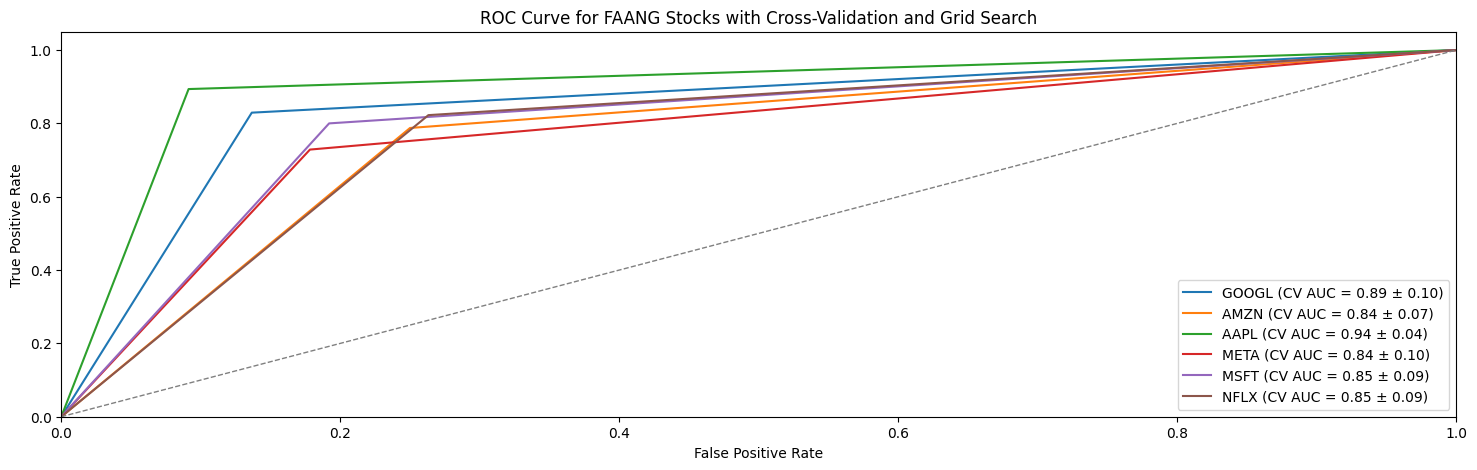

In [151]:


def logistic_regression_model_with_cv(faang_stock_data):

    for symbol in faang_stock_data['Symbol'].unique():
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        MA_20 = stock_data['S_20']
        MA_10 = stock_data['S_10']
        X = stock_data[selected_columns]
        y = (MA_20 >= MA_10).astype(int)
        
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # parameters to be used in grid search
        param_grid = {
            'C': [1.0,2.0,3.0,4.0,5,6,7,8,9,10.0],  
            'penalty': ['l1']
        }
        
        # perform grid search with a cv of 5
        grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='roc_auc')
        grid_search.fit(X_scaled, y)
        
        # Get the best model
        model = grid_search.best_estimator_
        
        # Evaluate the best model
        cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
        mean_auc = cv_scores.mean()
        std_auc = cv_scores.std()
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)
        
        fpr, tpr, _ = roc_curve(y, y_pred)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        conf_matrix = confusion_matrix(y, y_pred)

        print(f"Symbol: {symbol}")
        print(f"Best C: {grid_search.best_params_['C']}")
        print(f"Mean AUC: {mean_auc:.2f} ± {std_auc:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("")

        plt.plot(fpr, tpr, label=f'{symbol} (CV AUC = {mean_auc:.2f} ± {std_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for FAANG Stocks with Cross-Validation and Grid Search')
    plt.legend(loc='lower right')
    plt.show()

# Assuming faang_stock_data is your dataset containing FAANG stock information
logistic_regression_model_with_cv(faang_stock_data)


RandomForestRegressor(max_depth=7, max_features=0.7000000000000001,
                      max_samples=0.8, n_estimators=210)
MSE for GOOGL: 128.78370219346886
MAE for GOOGL: 8.654114636177026
RMSE for GOOGL: 11.348290716820259


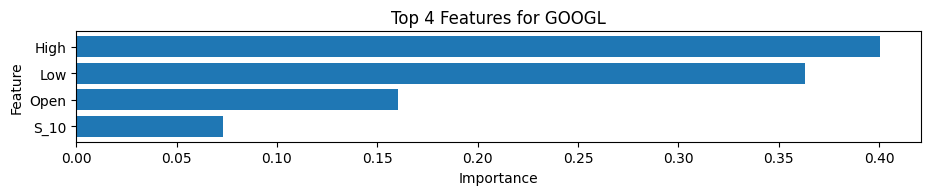

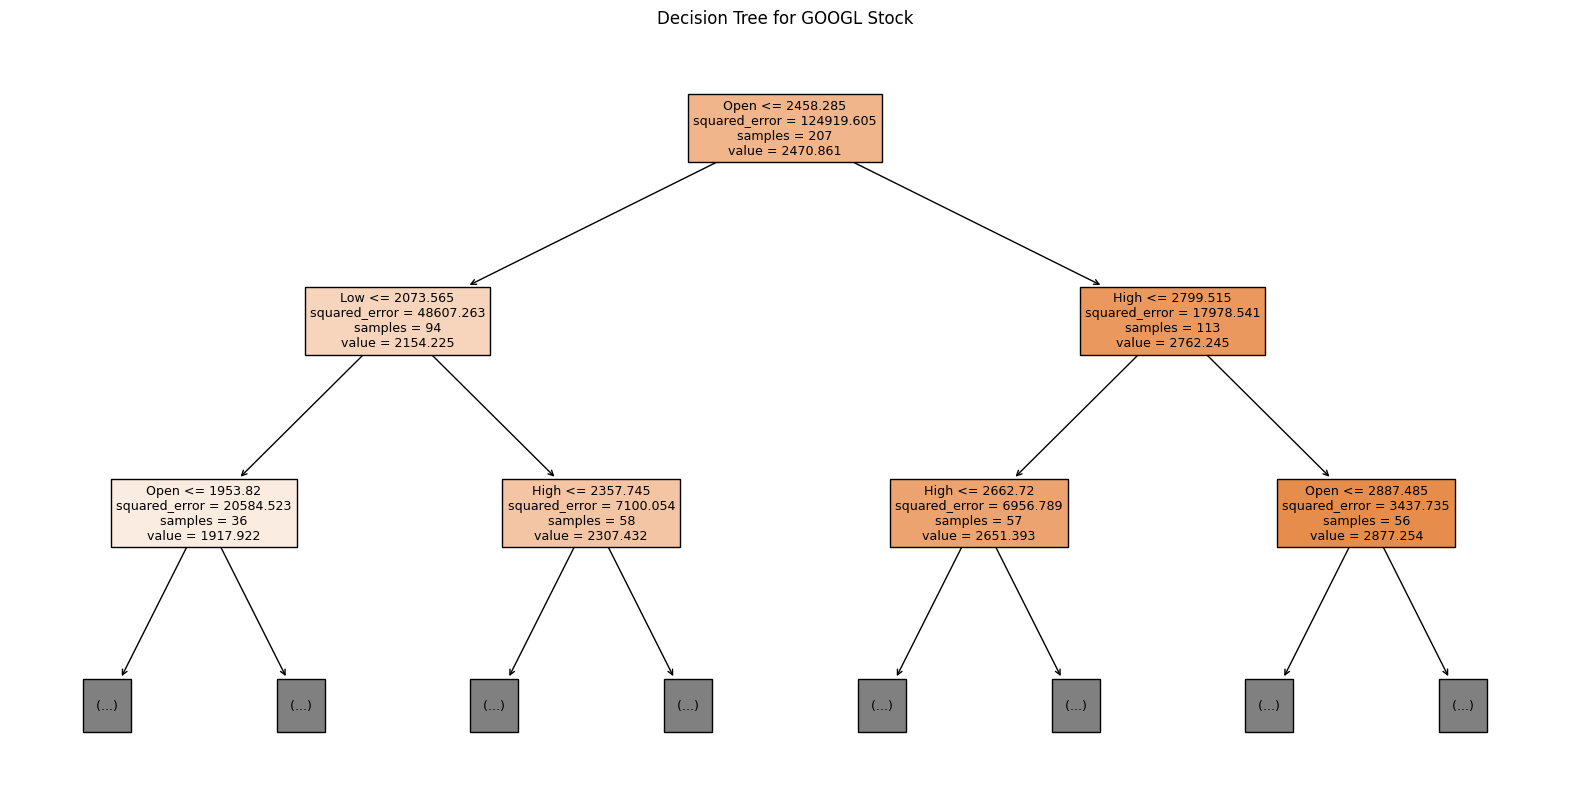

RandomForestRegressor(max_depth=9, max_features=0.7000000000000001,
                      max_samples=0.5, n_estimators=350)
MSE for AMZN: 0.9623811844702647
MAE for AMZN: 0.796168299232719
RMSE for AMZN: 0.9810102876475173


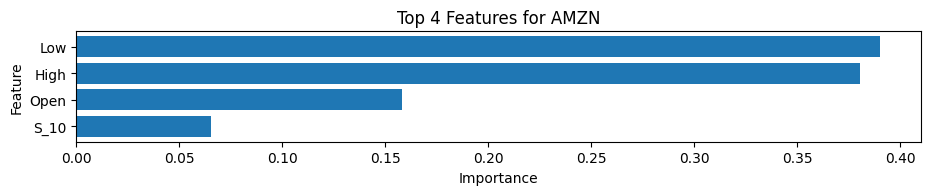

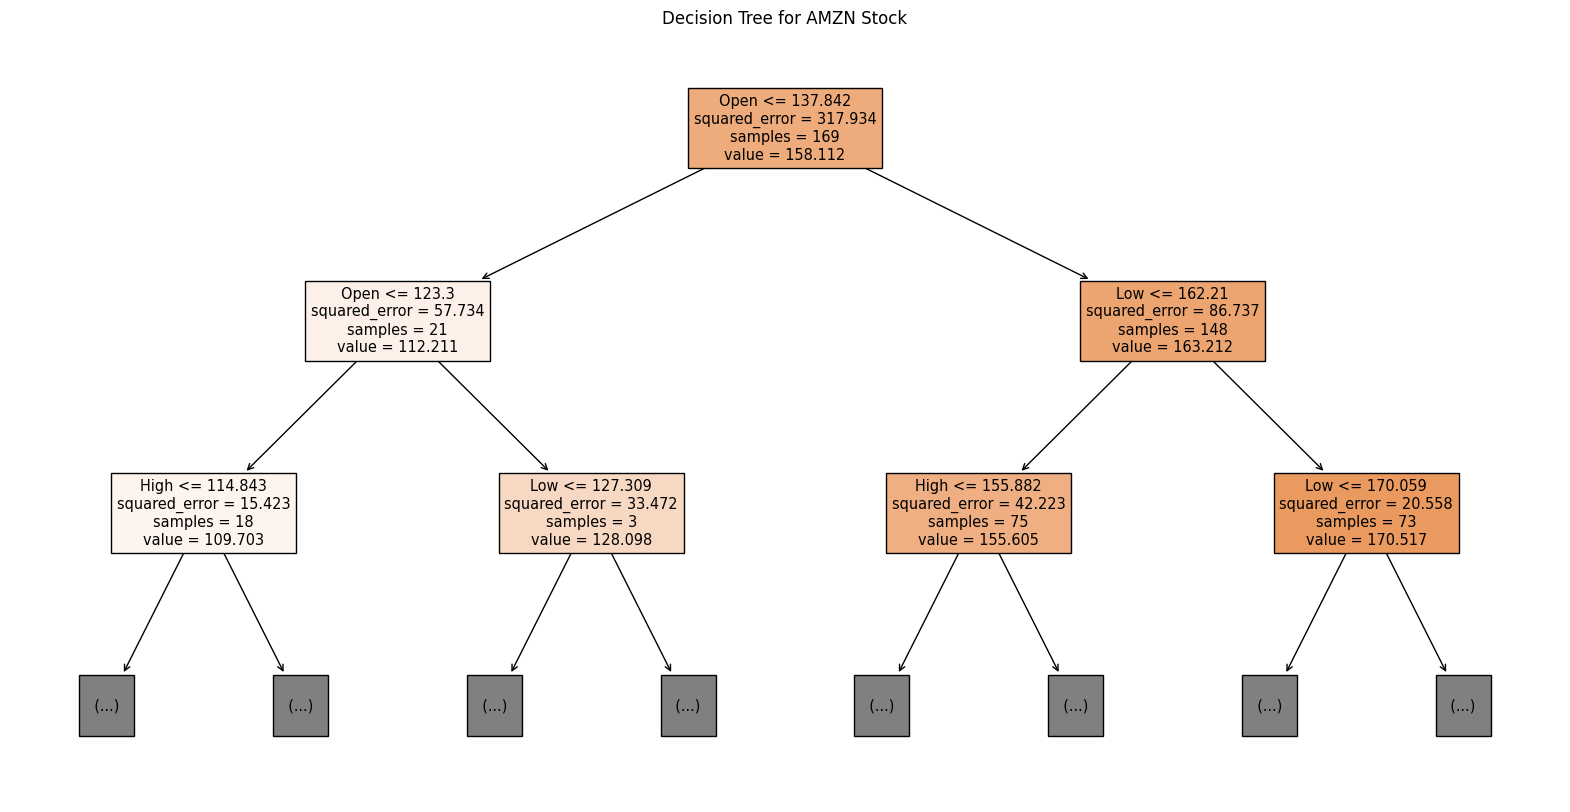

RandomForestRegressor(max_depth=7, max_features=0.6, max_samples=0.5,
                      n_estimators=270)
MSE for AAPL: 0.916054996284275
MAE for AAPL: 0.7577685362960707
RMSE for AAPL: 0.957107620011603


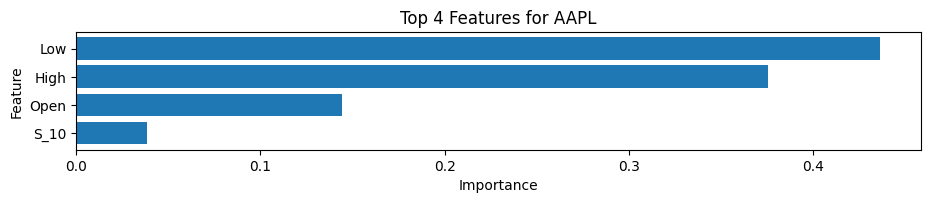

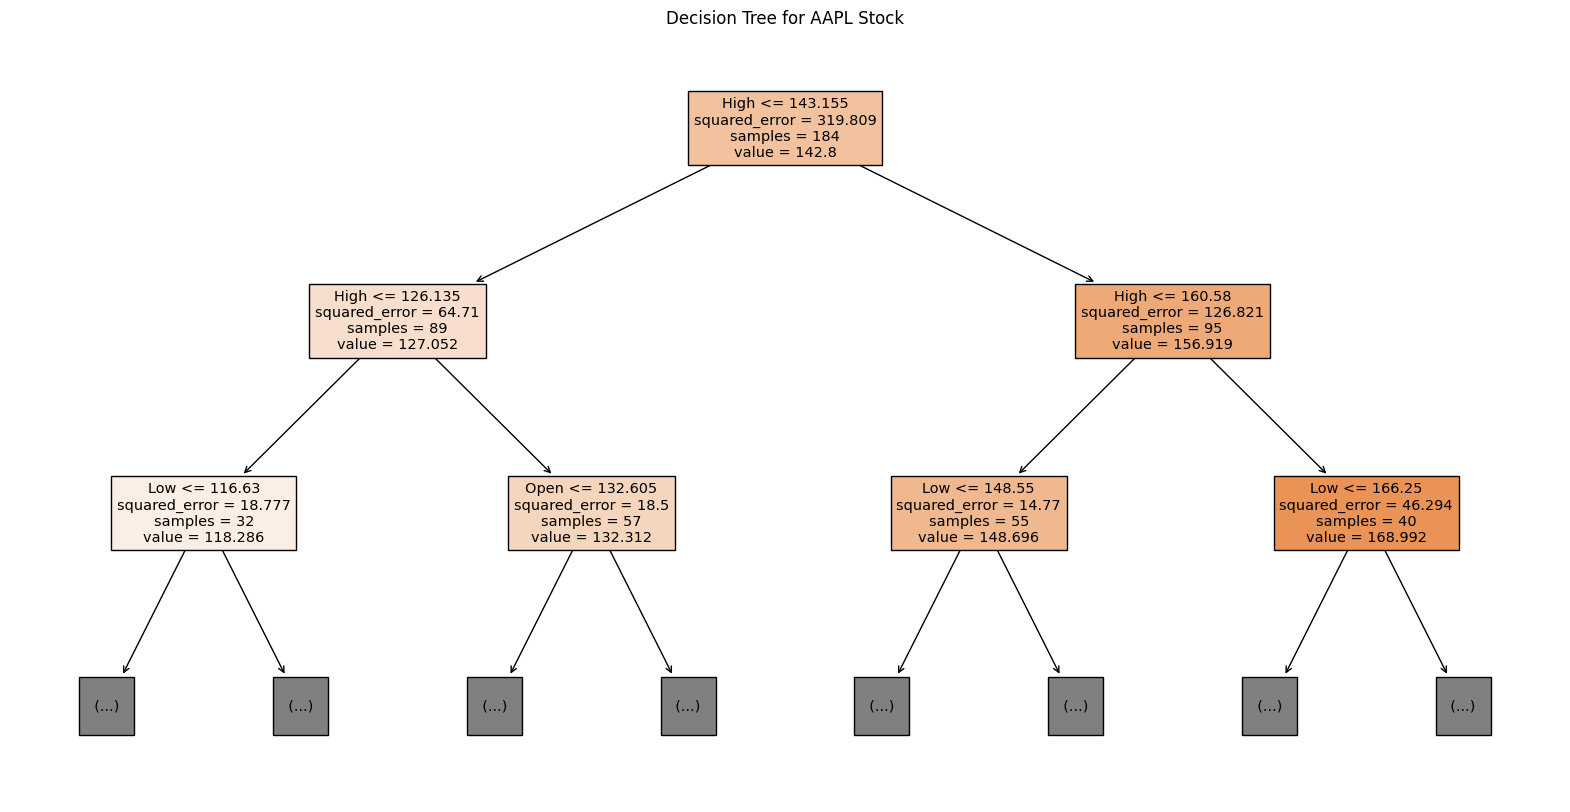

RandomForestRegressor(max_depth=9, max_features=0.8, max_samples=0.5,
                      n_estimators=320)
MSE for META: 3.7862776894354155
MAE for META: 1.5507514129482418
RMSE for META: 1.9458359872906594


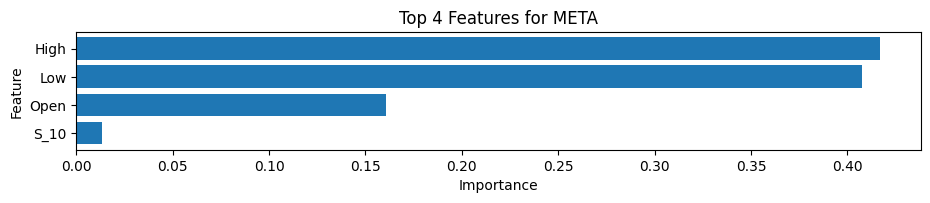

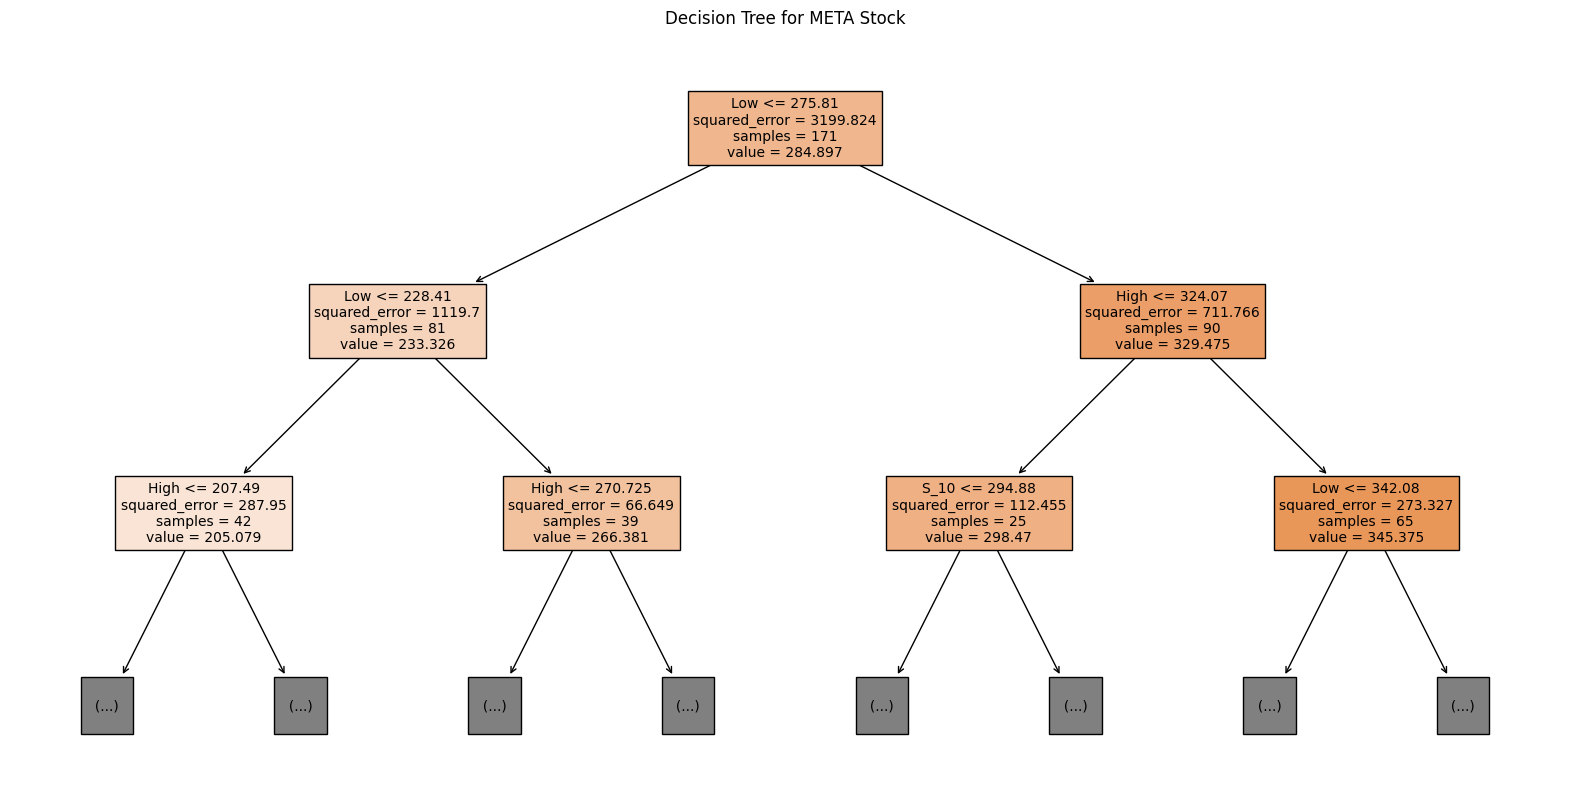

RandomForestRegressor(max_depth=9, max_features=0.7000000000000001,
                      max_samples=0.5, n_estimators=300)
MSE for MSFT: 1.9800122533105722
MAE for MSFT: 1.1640931777049177
RMSE for MSFT: 1.407129081964612


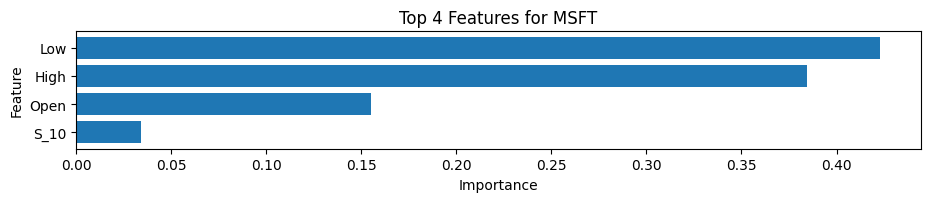

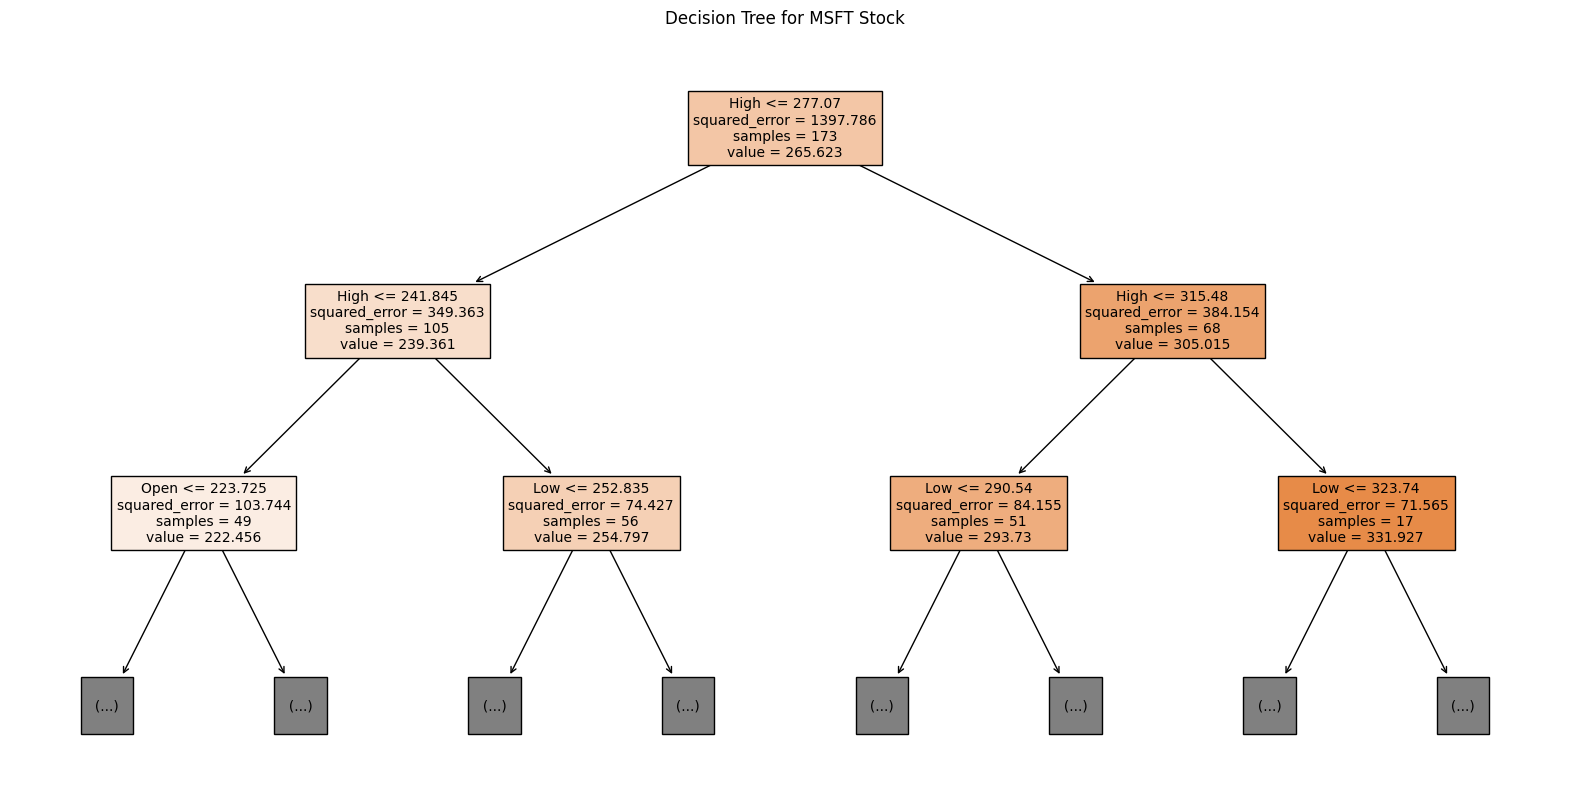

RandomForestRegressor(max_depth=7, max_features=0.9, max_samples=0.8,
                      n_estimators=280)
MSE for NFLX: 9.155294229004125
MAE for NFLX: 2.43281507050705
RMSE for NFLX: 3.025771674962294


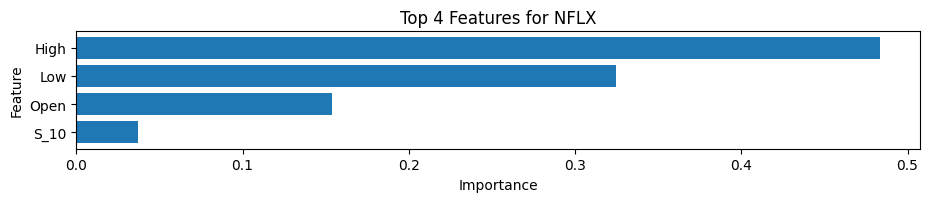

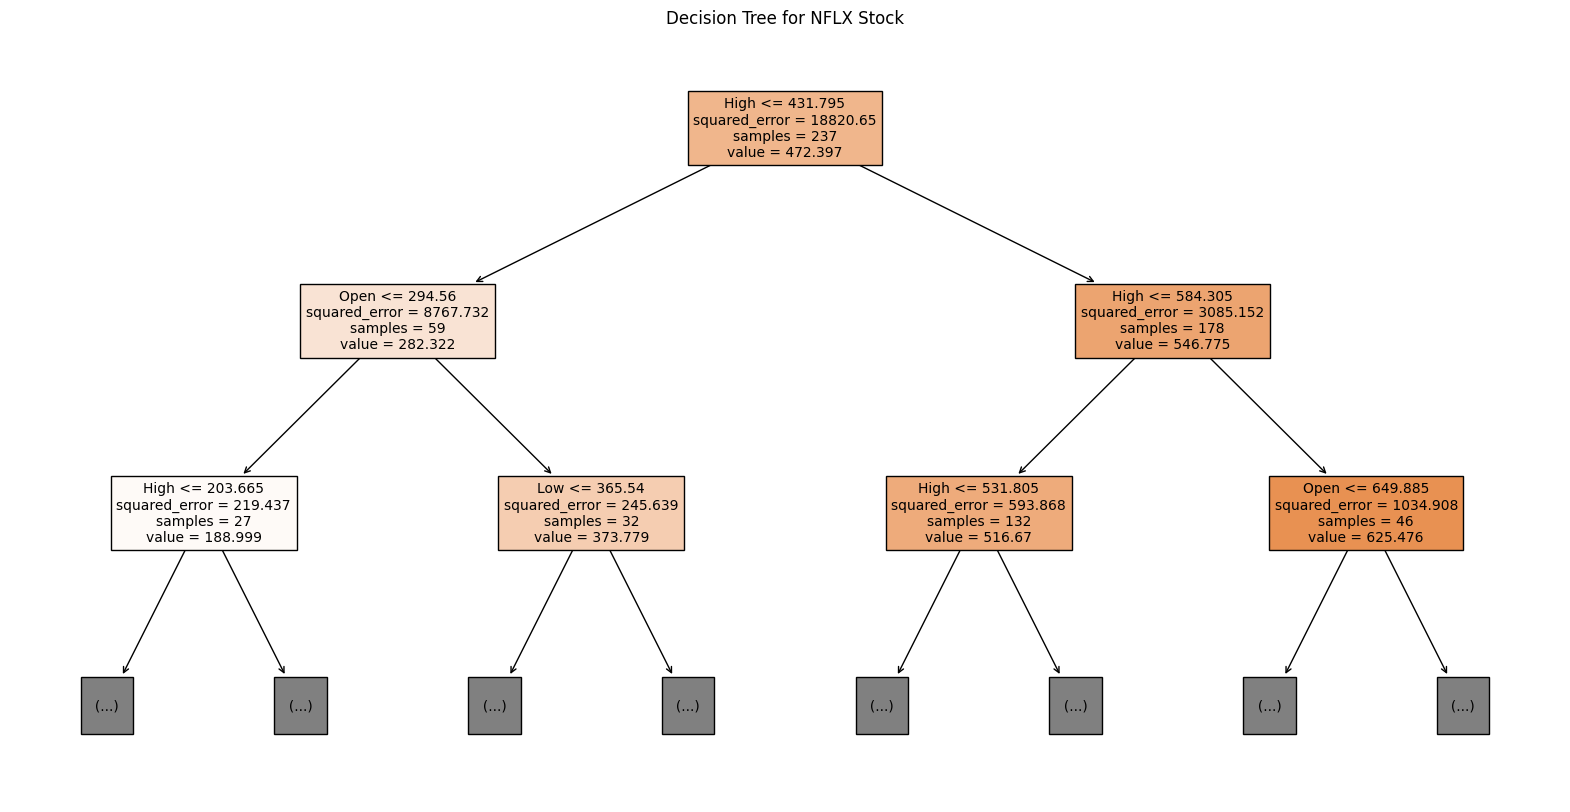

In [146]:

# Random forest 
def random_forest(faang_stock_datas,selected_columns):
    num_symbols = len(faang_stock_data['Symbol'].unique())
    cols = 2  
    rows = (num_symbols // cols) + (num_symbols % cols > 0) 
   
    for i, symbol in enumerate(faang_stock_data['Symbol'].unique()):
        stock_data = faang_stock_data[faang_stock_data['Symbol'] == symbol]
        X = stock_data[selected_columns]
        y = stock_data['Close']
        model = RandomForestRegressor(max_depth=3,n_estimators= 120, oob_score = True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
       
        param_grid = {'n_estimators':np.arange(50,400,10),
                    'max_features':np.arange(0.1, 1, 0.1),
                    'max_depth': [3, 5, 7, 9],
                    'max_samples': [0.3, 0.5, 0.8]}

        model = RSCV(RandomForestRegressor(), param_grid, n_iter = 15).fit(X_train, y_train)
        model = model.best_estimator_
        model.fit(X, y)
        print(model)

        y_pred = model.predict(X_test)
        rf_mse = mean_squared_error(y_test, y_pred)
        rf_mse = mean_squared_error(y_test, y_pred)
        rf_mae = mean_absolute_error(y_test, y_pred)
        rf_rmse = np.sqrt(rf_mse)
        # evaluation metrics
        print(f"MSE for {symbol}: {rf_mse}")
        print(f"MAE for {symbol}: {rf_mae}")
        print(f"RMSE for {symbol}: {rf_rmse}")
        
       
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_],
                    axis=0)
        indices = np.argsort(importances)[::-1]

        # most important features (up to 4)
        top_features_indices = indices[:4]
        top_features = [selected_columns[index] for index in top_features_indices]
        
        # plot using barchart
        plt.subplot(rows, cols, i + 1)
        plt.barh(top_features, importances[top_features_indices])
        plt.title(f"Top 4 Features for {symbol}")
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.gca().invert_yaxis()

        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(20, 10))
        plot_tree(model.estimators_[0], feature_names=selected_columns, filled=True, max_depth=2)
        plt.title(f'Decision Tree for {symbol} Stock')
        plt.show()

random_forest(faang_stock_data,selected_columns)